# Roj Gian Gorospe - 4CSC

Create the following visualizations using what you have learned up to this point.

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method. (5 pts)
2. Create a histogram and KDE of the change from open to close in the Facebook stock price. (5 pts)
3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia. (5 pts)
4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line. (5 pts)
5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price: (10 pts)

a. The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price.
b. The second subplot will be a bar plot showing the net effect this had monthly, using resample().
c. Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
d. Bonus #2: Modify the x-axis of the bar plot to show the three letter abbreviation for the month.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
file_path = 'fb_stock_prices_2018.csv'
fb_data = pd.read_csv(file_path)

In [4]:
# Convert the date column to datetime
fb_data['date'] = pd.to_datetime(fb_data['date'])

# Set the date column as the index
fb_data.set_index('date', inplace=True)

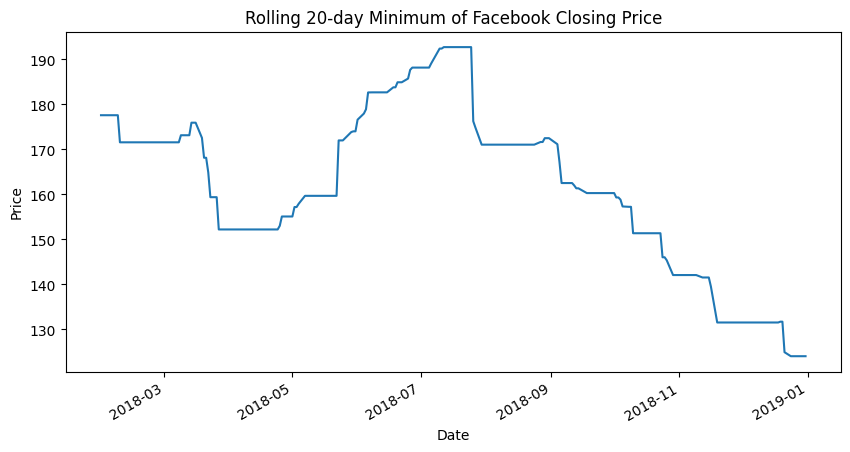

In [5]:
# 1. Plot the rolling 20-day minimum of the Facebook closing price
rolling_min = fb_data['close'].rolling(window=20).min()
rolling_min.plot(figsize=(10, 5), title='Rolling 20-day Minimum of Facebook Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

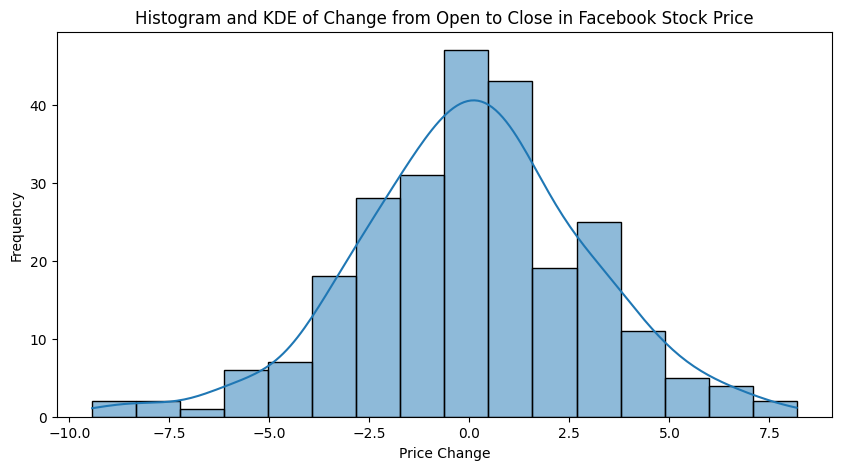

In [6]:
# 2. Create a histogram and KDE of the change from open to close in the Facebook stock price
fb_data['price_change'] = fb_data['close'] - fb_data['open']
plt.figure(figsize=(10, 5))
sns.histplot(fb_data['price_change'], kde=True)
plt.title('Histogram and KDE of Change from Open to Close in Facebook Stock Price')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()


In [7]:
# 3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

# Load the earthquake data from the uploaded file
file_path = 'earthquakes.csv'
earthquake_data = pd.read_csv(file_path)

# Display the first few rows and the column names of the dataset to understand its structure
earthquake_data.head(), earthquake_data.columns


(    mag magType           time                  place  tsunami parsed_place
 0  1.35      ml  1539475168010  9km NE of Aguanga, CA        0   California
 1  1.29      ml  1539475129610  9km NE of Aguanga, CA        0   California
 2  3.42      ml  1539475062610  8km NE of Aguanga, CA        0   California
 3  0.44      ml  1539474978070  9km NE of Aguanga, CA        0   California
 4  2.16      md  1539474716050  10km NW of Avenal, CA        0   California,
 Index(['mag', 'magType', 'time', 'place', 'tsunami', 'parsed_place'], dtype='object'))

C:\Users\rojgi\AppData\Local\Temp\ipykernel_22188\652268635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indonesia_earthquakes['mag'] = pd.to_numeric(indonesia_earthquakes['mag'], errors='coerce')


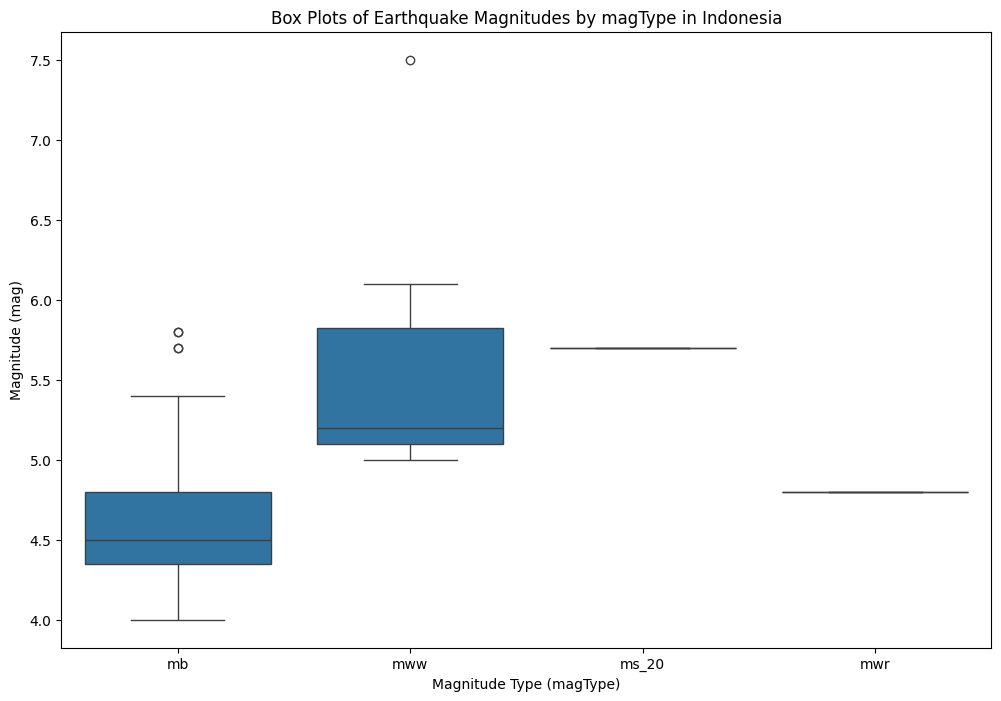

In [8]:


# Filter the dataset to include only earthquakes that occurred in Indonesia
indonesia_earthquakes = earthquake_data[earthquake_data['parsed_place'].str.contains('Indonesia', case=False, na=False)]

# Convert the 'mag' column to numeric, as it may have been read as a string
indonesia_earthquakes['mag'] = pd.to_numeric(indonesia_earthquakes['mag'], errors='coerce')

# Drop any rows with missing 'mag' or 'magType' values
indonesia_earthquakes = indonesia_earthquakes.dropna(subset=['mag', 'magType'])

# Create box plots for each magType
plt.figure(figsize=(12, 8))
sns.boxplot(x='magType', y='mag', data=indonesia_earthquakes)
plt.title('Box Plots of Earthquake Magnitudes by magType in Indonesia')
plt.xlabel('Magnitude Type (magType)')
plt.ylabel('Magnitude (mag)')
plt.show()


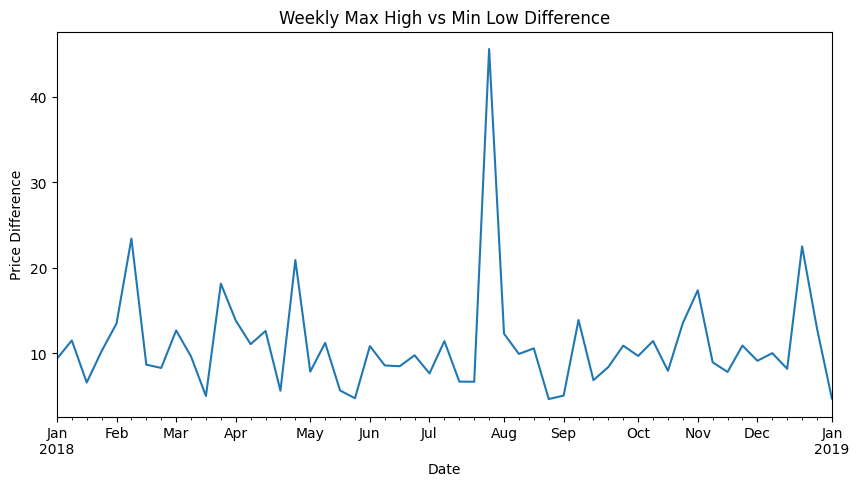

In [9]:
# 4. Line plot of the difference between the weekly maximum high price and the weekly minimum low price
weekly_diff = fb_data['high'].resample('W').max() - fb_data['low'].resample('W').min()
weekly_diff.plot(figsize=(10, 5), title='Weekly Max High vs Min Low Difference')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()


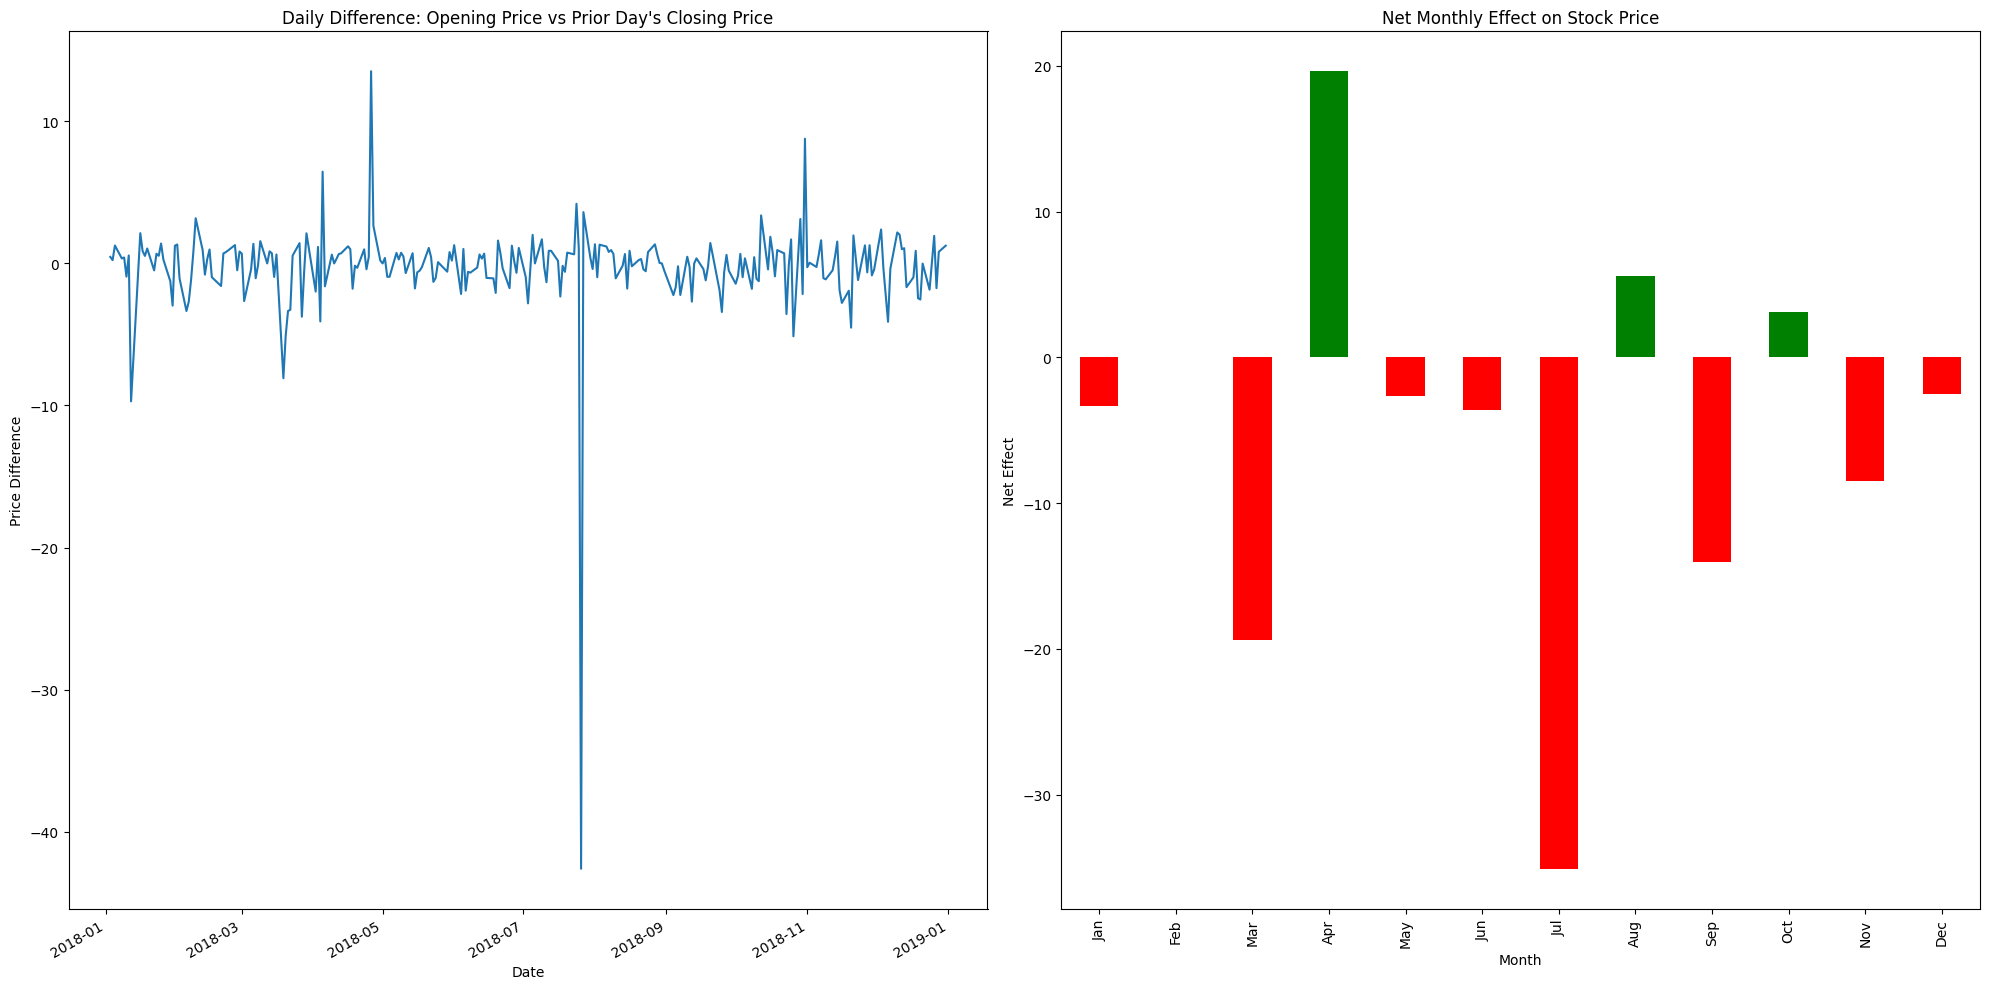

In [10]:
# 5. Create two subplots side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# 5a. First subplot: daily difference between that day's opening price and the prior day's closing price
fb_data['daily_diff'] = fb_data['open'] - fb_data['close'].shift(1)
fb_data['daily_diff'].plot(ax=axes[0], title='Daily Difference: Opening Price vs Prior Day\'s Closing Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price Difference')

# 5b. Second subplot: net effect monthly, colored bars for gains and drops
monthly_effect = fb_data['daily_diff'].resample('M').sum()
bar_colors = ['green' if x > 0 else 'red' for x in monthly_effect]
monthly_effect.plot(kind='bar', ax=axes[1], color=bar_colors, title='Net Monthly Effect on Stock Price')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Net Effect')
axes[1].set_xticklabels([date.strftime('%b') for date in monthly_effect.index])

plt.tight_layout()
plt.show()